# Linear Algebra

## Scipy

In this lecture, we will start to explore some practical problems that can be solved by applying algorithms to some data. Python provides several libraries to perform complex scientific and technical operations, and [SciPy](https://scipy.github.io/devdocs/index.html) is one of the most complete available libraries.

SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

Available sub-packages include:

- `constants`: physical constants and conversion factors
- `linalg`: linear algebra routines (today)
- `optimize`: optimization algorithms including linear programming (next lecture)
- `interpolate`: interpolation tools (next lecture)
- `stats`: statistical functions (next lectures)
- `integrate`: numerical integration routines (next lecture)
- `fft`: Discrete Fourier Transform algorithms (next lectures)
- `fftpack`: Legacy interface for Discrete Fourier Transforms (next lectures)
- `sparse`: sparse matrices and related algorithms
- and many others

The `scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on Numpy arrays, so that Numpy and `scipy` work hand in hand.

In this noteboook, we will review a few examples and applications. Sometimes Numpy implements those methods too: if a given algorithm is present both in Numpy and Scipy, typically the latter is more performant.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

## Matrix operations

Remember that two vectors may have two very different products:
 - The [inner product](https://numpy.org/doc/stable/reference/generated/numpy.inner.html), expressed as $v^T w$ (with $v$ and $w$ that are column vectors), is the product of a $1 \times n$ vector with an $n \times 1$ vector, and the result of the inner product is a **scalar**.
 - The [outer product](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) of two vectors is given by:
$$
v\otimes w = vw^T
$$
and the result of the outer product is a **matrix**.

In [7]:
# norm of a vector
v = np.array([1, 3])
print("Norm:", la.norm(v))

# distance between two vectors, represented by numpy arrays
w = np.array([3, 8])
print("Distance:", la.norm(v - w))

# inner product
print("Dot prod:", v.dot(w))
print(np.dot(v,w))

# inner product
print("Inner prod:", np.inner(v, w)) # with 1D arrays, np.dot and np.inner are equivalent

# outer product
print("Outer prod:\n", np.outer(v, w))

Norm: 3.1622776601683795
Distance: 5.385164807134504
Dot prod: 27
27
Inner prod: 27
Outer prod:
 [[ 3  8]
 [ 9 24]]


Of course, `scipy` also offers optimized methods to calculate the trace of a matrix (the sum of the diagonal elements in a square matrix):

In [6]:
M = np.random.randint(100, size=(6, 6))
print(M, '\n')
print("Trace:\n", M.trace(), '\n')
print(np.trace(M))

[[86 25 47 20 31 44]
 [ 9 85  5 66 95 67]
 [ 0 64 23 78 65 20]
 [89 49 37 73 35 53]
 [84 52 55 86 22 61]
 [83 51 21 78 48 27]] 

Trace:
 316 

316


... the determinant:

In [11]:
print("Determinant:\n", la.det(M), '\n')


Determinant:
 1083571200.999996 



...and the inverse (if exists):

In [12]:
print("Inverse of M:\n", la.inv(M), '\n')


Inverse of M:
 [[ 0.01076015  0.01320754 -0.02965033 -0.09086736  0.04259108  0.05379883]
 [ 0.07931609  0.15382895 -0.23088782 -0.97868714  0.50561022  0.43887051]
 [ 0.01916271 -0.01005709  0.01939749 -0.01541916  0.0095077  -0.01185325]
 [-0.04540641 -0.06255339  0.09329359  0.38523518 -0.1898917  -0.16707346]
 [-0.02182862 -0.06391288  0.10869413  0.42117172 -0.23333461 -0.18592409]
 [-0.02782062 -0.02901186  0.049433    0.27830557 -0.12997145 -0.13491463]] 



#### Example: calculate the covariance matrix with the outer product

As a first practical example for matrix operations, we want to calculate the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) from a given data set.

Suppose we have $n$ measurements (rows) and $p$ variables (columns). The dataset would be a matrix $V$, which  is therefore a $n \times p$ matrix. If all the variables (columns) have **zero mean**, the covariance matrix can be evaluated as:

$$C = \frac{V^T V}{n-1}$$

This is a multiplication of a $p \times n$ matrix ($V^T$), and a $n \times p$ matrix ($V$), which results in a $p \times p$ matrix.

In [22]:
# generate 4 sequences of 10 random numbers (flat between 0 and 1)
n, p = 10, 4
v = np.random.random(size=(n, p))
#v = np.random.uniform(size=(n,p))
#v = np.random.rand(10,4)
print(v) # 10 x 4 matrix

[[0.57543992 0.64244534 0.69497987 0.85005382]
 [0.06932432 0.96181505 0.61082083 0.44191345]
 [0.78799327 0.2404705  0.98742589 0.32710373]
 [0.72316353 0.33347371 0.07670807 0.34669638]
 [0.85966494 0.16222163 0.49291229 0.23788198]
 [0.43804505 0.37005011 0.90804414 0.36850494]
 [0.4342119  0.35644581 0.48376694 0.06602021]
 [0.40012079 0.78321086 0.63292868 0.99475988]
 [0.12505862 0.1659117  0.69103351 0.14446868]
 [0.268631   0.12418774 0.81266136 0.8863508 ]]


In [10]:
# compute the mean of each sequence (row) with a numpy reduction
v_mean = np.mean(v, axis=0)
print("Mean for each column:\n", v_mean, '\n')

# re-center each sequence (column) around its mean
w = v - v_mean  #BROADCASTING  OPERATION! DO YOU REMEMBER? 
print("Centered matrix:\n", w, '\n')

# compute the covariance matrix
cov = (w.T).dot(w) / (n - 1)
print("Covariance matrix:\n", cov, '\n')

# The covariance matrix can be calculated directly from numpy
np_cov = np.cov(v, rowvar=False) #THE VARIABLES ARE COLUMNS!!!
# remember to specify rowvar=False is you want to use this notation!
print("Covariance matrix with Numpy:\n", np_cov, '\n')

print("Are they the same?", np.allclose(cov, np_cov))   #NEVER COMPARE MATRIX WITH THE OPERATOR "==" !!!!!!!

Mean for each column:
 [0.49795212 0.54409763 0.65920558 0.46328814] 

Centered matrix:
 [[ 0.36971907  0.09133192 -0.14874509  0.27772064]
 [ 0.30370849  0.44425863 -0.40461747  0.22359799]
 [-0.40736332 -0.13067165  0.26334304  0.20628624]
 [ 0.00780336  0.12785764  0.13856578 -0.11704973]
 [ 0.22074451 -0.10092689  0.12141348 -0.42460835]
 [-0.03790604 -0.01815391 -0.15028584  0.49087819]
 [-0.23731104 -0.1130772  -0.65771369 -0.12339577]
 [ 0.07046904  0.03463121  0.33944397 -0.12641796]
 [-0.30094014 -0.04193972  0.2413454  -0.30665343]
 [ 0.01107606 -0.29331004  0.25725042 -0.10035781]] 

Covariance matrix:
 [[ 0.06634132  0.02666416 -0.01570608  0.00942784]
 [ 0.02666416  0.0390468  -0.0243343   0.01873265]
 [-0.01570608 -0.0243343   0.10932804 -0.03117563]
 [ 0.00942784  0.01873265 -0.03117563  0.08221657]] 

Covariance matrix with Numpy:
 [[ 0.06634132  0.02666416 -0.01570608  0.00942784]
 [ 0.02666416  0.0390468  -0.0243343   0.01873265]
 [-0.01570608 -0.0243343   0.10932804 

## Linear systems

In several cases, some computational problems can be reduced to solving linear systems.
If you are dealing with a problem that can be expressed with a linear systems of the type:

$$A x = b$$

Of course, $A$ needs to be a **square** matrix (BECAUSE WE WANT THAT THE NUMBER OF EQUATIONS CONCIDES WITH THE ONE OF THE VARIABLES).

`scipy` provides a `solve()` [method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html) for solving it.

Still, knowing a little bit what are the algorithms underneath comes handy sometimes, e.g. the solve method can be instructed about what kind of matrix $A$ is likely to be (symmetric, hermitian, positive definite, etc.)

In [9]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
print("A:\n", A, '\n')
print("b:\n", b, '\n')

A:
 [[ 3  2  0]
 [ 1 -1  0]
 [ 0  5  1]] 

b:
 [ 2  4 -1] 



In [11]:
# Let Scipy find the x solutions
x = la.solve(A, b)
print("x:", x, '\n')
print("Ax:", np.dot(A, x), '\n')
print("Is Ax == b?", np.allclose(np.dot(A, x), b)) # note: do not use == with floats

x: [ 2. -2.  9.] 

Ax: [ 2.  4. -1.] 

Is Ax == b? True


## Matrix Decomposition

Unfortunately, if the amount of input data is large, solving linear systems by inverting the matrix can quickly become unpractical from the computational point of view:

In [12]:
n = 1000 # now try with 100000...
A = np.random.randn(n, n)
b = np.random.randn(n)
x = la.solve(A, b)
print("x:", x)

x: [ 2.47220662e-01 -1.09491606e+00 -4.34986790e+00  2.03018156e+01
 -1.08476304e+01  1.83228750e+01 -1.69191336e+01 -1.35419139e+00
  1.05491636e+01  3.68027417e+00  8.48325754e+00 -4.56157313e+00
 -3.84013802e+00  2.19651981e+00  5.40748719e+00 -3.60094012e-01
 -4.28499977e+00 -1.51923421e+01 -5.87439696e+00  6.14960877e+00
  8.70578778e+00  9.16378465e+00  4.41658949e+00  1.21342502e+00
 -1.05975946e+00 -4.00647809e+00  2.35097665e-01 -1.11253965e+01
 -1.53467649e+00 -2.67687065e+01  1.41224616e+00  4.42446845e+00
  5.90916423e+00 -1.90763174e+00  8.53473807e+00  1.66590780e+01
  6.12336770e+00 -1.01385616e+01  1.06491981e+01 -1.39654821e+01
  5.89837602e+00 -6.88981025e+00  1.84404809e+00  2.33597561e+00
  1.71738326e+01  3.44895789e-01  6.65738936e+00  4.05442151e+00
  3.11936069e+00  1.71215083e+01 -9.25229504e-01  3.95831561e+00
 -3.11477441e+00 -6.47339610e-01 -3.64620740e+00  7.23245878e+00
  1.38769553e+01 -1.71980061e+01  2.53712964e+00 -1.31662169e+01
 -9.15763891e-01 -1.11

An example is the [Netflix Competition](https://en.wikipedia.org/wiki/Netflix_Prize), where a matrix of $400000 \times 18000$ (ratings times movies) needed to be dealt with.

In these cases, the problem should be tackled by operating some convenient transformation of the input matrix.

In the mathematical discipline of linear algebra, a **matrix decomposition** is a factorization of a matrix into a product of matrices. Matrix decompositions are an important step in solving linear systems in a computationally efficient manner.

### Lower-Upper factorization

Let $A$ be a **square** matrix. An [LU factorization](https://en.wikipedia.org/wiki/LU_decomposition) refers to the factorization of $A$, with a proper row and/or column orderings or permutations, into two factors: a lower triangular matrix $L$ and an upper triangular matrix $U$:

$A=LU$

when solving a system of linear equations, $Ax=b=LUx$, the solution is done in two logical steps:

1. solve $Ly=b$ for $y$.
2. solve $Ux=y$ for $x$.

Often a permutation $P$ is needed (*partial pivoting*) to best reorder the rows of the original matrix.

The `scipy.linalg` method `lu()` performs the [LU decomposition](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html):

In [13]:
A = np.array([[1, 3, 4], [2, 1, 3], [4, 1, 2]])
print("A:\n", A, "\n")

P, L, U = la.lu(A)
# P is the permutation matrix of the original matrix A
print("P:\n", P, '\n')
print("L:\n", L, '\n')
print("U:\n", U, '\n')
print("LU:\n", np.dot(L, U), '\n')
plu = np.dot(P, np.dot(L, U))
print("PLU:\n", plu, '\n')
print("Are PLU and A the same?", np.allclose(plu, A), '\n')

A:
 [[1 3 4]
 [2 1 3]
 [4 1 2]] 

P:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

L:
 [[1.         0.         0.        ]
 [0.25       1.         0.        ]
 [0.5        0.18181818 1.        ]] 

U:
 [[4.         1.         2.        ]
 [0.         2.75       3.5       ]
 [0.         0.         1.36363636]] 

LU:
 [[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 

PLU:
 [[1. 3. 4.]
 [2. 1. 3.]
 [4. 1. 2.]] 

Are PLU and A the same? True 



### Eigendecomposition

Given a **square** $n\times n$ matrix $A$, with $\det{A}\ne0$, then there exist $n$ linearly independent eigenvectors and $A$ may be decomposed in the following manner:

$$ 
A=V\Lambda V^{-1}
$$

where $\Lambda$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$ and the columns of $V$ are the corresponding eigenvectors of $A$.

Eigenvalues are roots of the *characteristic polynomial* of $A$:

$$
\det{(A-\lambda I)}=0
$$

with $I$ being the identity matrix.

Eigenvectors are the vectors that solve the equation:

$$
A v = \lambda v
$$

for all eigenvalues $\lambda$.

The eigendecomposition is performed by the method `eig()` ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html)):

In [18]:
A = np.array([[0, 1, 1], [2, 1, 0], [3, 4, 5]])
print("A:\n", A, '\n')

l, V = la.eig(A)
# the eigenvalues
print("l:\n", l, '\n')
print("real(l):\n", np.real_if_close(l), '\n')
# V is the matrix of the eigenvectors
print("V:\n", V, '\n')
print("A v:", A.dot(V[:, 0]), " = l v:", V[:, 0]*np.real_if_close(l[0])) # test the definition of the first eigenvector

A:
 [[0 1 1]
 [2 1 0]
 [3 4 5]] 

l:
 [ 5.85410197+0.j -0.85410197+0.j  1.        +0.j] 

real(l):
 [ 5.85410197 -0.85410197  1.        ] 

V:
 [[ 1.80228488e-01  6.72063326e-01 -6.22075198e-17]
 [ 7.42582208e-02 -7.24947536e-01 -7.07106781e-01]
 [ 9.80817725e-01  1.50936928e-01  7.07106781e-01]] 

A v: [1.05507595 0.4347152  5.74180697]  = l v: [1.05507595 0.4347152  5.74180697]


Check that the decomposition $V \Lambda V^{-1}$ returns the original matrix $A$:

In [19]:
D = np.dot(V, np.dot(np.diag(np.real_if_close(l)), la.inv(V)))
print(D, '\n')
print("Are A and D equal?", np.allclose(A, D))

[[ 3.15389796e-17  1.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00  1.00000000e+00 -4.33283346e-16]
 [ 3.00000000e+00  4.00000000e+00  5.00000000e+00]] 

Are A and D equal? True


### Singular Value Decomposition

Another important matrix decomposition is the *singular value decomposition* or SVD. For any $m\times n$ matrix $A$, we may write:

$$A=USV^T$$

where (assuming $A$ is real):
 - $U$ is a $m\times m$ orthogonal, unitary matrix
 - $S$ (spectrum) is a rectangular, diagonal $m\times n$ matrix with diagonal entries $d_1,\dots,d_m$ all non-negative
 - $V$ is a $n\times n$ orthogonal, unitary matrix.

The singular-value decomposition is a generalization of the eigendecomposition in the sense that it can be applied to any $m \times n$ matrix whereas eigenvalue decomposition can only be applied to diagonalizable matrices. 

Given an SVD of $A$, as described above, the following holds:

$$
A^T A = VS^TU^T USV^T = VS^TSV^T 
$$
$$
A A^T = US^TV^T VSU^T = US^TSU^T 
$$

The right-hand sides of these relations describe the **eigenvalue decompositions** of the left-hand sides. Therefore, the SVD can be seen as running twice the eigenvalue decomposition for the equations above.

Consequently:
* the columns of V (right-singular vectors) are eigenvectors of $A^TA$.
* the columns of U (left-singular vectors) are eigenvectors of $AA^T$.
* the elements on the diagonal of the matrix $S^TS$ are the eigenvalues of $A^TA$ or $AA^T$ (follows from the eigenvalue decomposition $A = V \Lambda V^{-1}$). In other words, the elements of the diagonal matrix $S$ are the square root of the eigenvalues of $A^TA$ or $AA^T$.

A geometrical representation of SVD is given by the following figure:

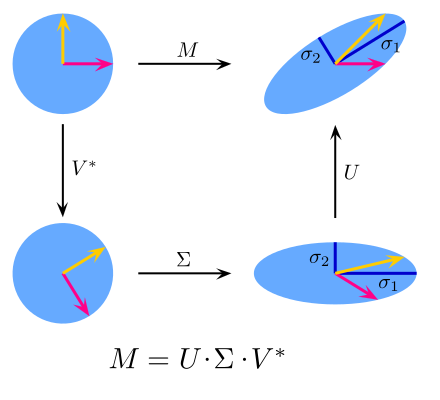

In [5]:
from IPython.display import Image
Image("images/Singular-Value-Decomposition.png")

Needless to say, the SVD is [implemented](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) in `scipy.linalg` in the the `svd()` method:

In [8]:
m, n = 5, 4
A = np.random.randn(m, n) #+ 1.j*np.random.randn(m, n) # it also work with complex numbers
print("A:\n", A, '\n')

# perform the SVD
U, s, Vt = la.svd(A)

# attention: s is the vector of the diagonal termns, not a matrix
print("shapes: U =", U.shape, "S:", s.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

A:
 [[-0.33567916  0.704518   -1.85021469  0.11179906]
 [-1.03021219  0.05100727 -1.89196663 -0.77420666]
 [-0.35700069  1.34753785 -0.98959974  0.17662926]
 [ 0.69841488  1.0430213  -1.56371718 -0.27106626]
 [-0.810275    0.89147768  0.11154212 -0.53855325]] 

shapes: U = (5, 5) S: (4,) V^T: (4, 4) 

Spectrum:
 [3.62942043 1.56547033 1.40389098 0.70379678] 

U:
 [[-0.54121556 -0.05943542  0.15682879  0.51075575 -0.64659605]
 [-0.54088767  0.70074606  0.29154218 -0.19143612  0.30781629]
 [-0.410878   -0.2500722  -0.49694781  0.42626499  0.58308163]
 [-0.4750115  -0.59985379  0.15397691 -0.6251533  -0.00373718]
 [-0.14166718  0.2882043  -0.78723686 -0.36050284 -0.38362029]] 

V^T:
 [[ 0.18422276 -0.43651576  0.87019209  0.13520982]
 [-0.80816703 -0.45471607  0.00114989 -0.37429671]
 [ 0.40589644 -0.77320777 -0.48334379  0.06145414]
 [-0.38493649 -0.06954884 -0.09562002  0.91533801]] 



Let's verify the definition of SVD by hand:

In [9]:
# Build the matrix S
S = np.zeros((m, n))
for i in range(min(m, n)):
    S[i, i] = s[i]
print("S:\n", S, '\n')

SVD = np.dot(U, np.dot(S, Vt))
print("SVD:\n", SVD, '\n')
print("Are the SVD and A matrices equal?", np.allclose(SVD, A))

S:
 [[3.62942043 0.         0.         0.        ]
 [0.         1.56547033 0.         0.        ]
 [0.         0.         1.40389098 0.        ]
 [0.         0.         0.         0.70379678]
 [0.         0.         0.         0.        ]] 

SVD:
 [[-0.33567916  0.704518   -1.85021469  0.11179906]
 [-1.03021219  0.05100727 -1.89196663 -0.77420666]
 [-0.35700069  1.34753785 -0.98959974  0.17662926]
 [ 0.69841488  1.0430213  -1.56371718 -0.27106626]
 [-0.810275    0.89147768  0.11154212 -0.53855325]] 

Are the SVD and A matrices equal? True


## Principal Component Analysis 

Principal Components Analysis (PCA) aims to find and rank all the eigenvalues and eigenvectors of the covariance matrix of a given dataset. This is useful because high-dimensional data (with $p$ features) may have nearly all their variation in a small number of dimensions $k < p$, i.e. in the subspace spanned by the eigenvectors of the covariance matrix that have the $k$ largest eigenvalues. If we project the original data into this subspace, we can have a dimension reduction (from $p$ to $k$) with a limited loss of information.

In [48]:
# construct a dataset with a skewed 2D distribution
mu = [0, 0] # centered on 0
cv = [[0.9, 0.1], [0.1, 0.1]] # input covariance matrix: asymmetric sigmas = LA COVARIANZA DI X CON X È STATA IMPOSTATA PIÙ ALTA.
                              # LA COVARIAZA DI X CON Y OVVIAMENTE DEVE ESSERE LA STESSA DI Y CON X 
n = 1000
# generate random numbers according to a 2D normal distribution
X = np.random.multivariate_normal(mu, cv, n)#.T
print("Shape:", X.shape, '\n', X)

Shape: (1000, 2) 
 [[ 1.0896147   0.20976327]
 [-0.06955073 -0.012613  ]
 [-1.21476373 -0.36551116]
 ...
 [ 0.08238434 -0.15205319]
 [-0.05942552 -0.55113054]
 [-0.4317346  -0.12397938]]


(-3.0, 3.0)

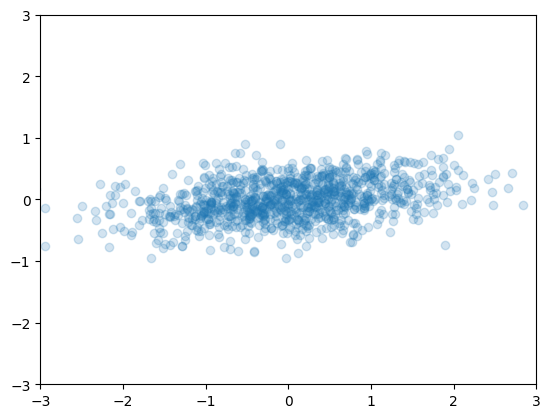

In [49]:
#plt.scatter(X[0,:], X[1,:], alpha=0.2)
plt.scatter(X[:,0], X[:,1], alpha=0.2)

plt.xlim([-3, 3])
plt.ylim([-3, 3])

Numerically, PCA can be done either by means of **eigendecomposition on the covariance matrix** or via **SVD on the data matrix**. Even though the latter is usually preferred, let's have first a look at the former.


### PCA with eigendecomposition

Let's recall the definition of the covariance matrix (of 2 variables):

$$
{\rm Cov}(X,Y)=\frac{\sum_{i=1}^n (X_i-\bar{X})(Y_i-\bar{Y})}{n-1}
$$

with Cov$(X,X)$ the variance of the variable $X$, and $n$ the number of entries.

In the case the features of the datasets have all **zero mean**, the covariance matrix is of the form:

$$
{\rm Cov}(X)=\frac{X^T X}{n-1}
$$

In [50]:
# the covariance matrix
cov = np.cov(X, rowvar=False)
#cov = np.dot(X.T, X)/(n-1) # this would yield the same result
print("Covariance matrix:\n", cov, '\n')

# now find the eigenvectors of the covariance matrix
l, V = la.eig(cov)
# take only the real component, if possible
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

# Check that V is actually an orthogonal matrix (and thus its transpose is also its inverse)
print("VV^T:\n", V.dot(V.T), '\n')

Covariance matrix:
 [[0.931132   0.11291814]
 [0.11291814 0.10661441]] 

Eigenvalues:
 [0.94631656 0.09142985] 

Eigenvectors:
 [[ 0.99107917 -0.13327442]
 [ 0.13327442  0.99107917]] 

VV^T:
 [[ 1.0000000e+00 -2.1843056e-18]
 [-2.1843056e-18  1.0000000e+00]] 



Eigenvalue: 0.8939816231562885 ,
eigenvector: [0.99374184 0.11170121]
Eigenvalue: 0.08624930935096577 ,
eigenvector: [-0.11170121  0.99374184]


Text(0.5, 1.0, 'Eigendecomposition:\neigenvectors of covariance matrix scaled by eigenvalue')

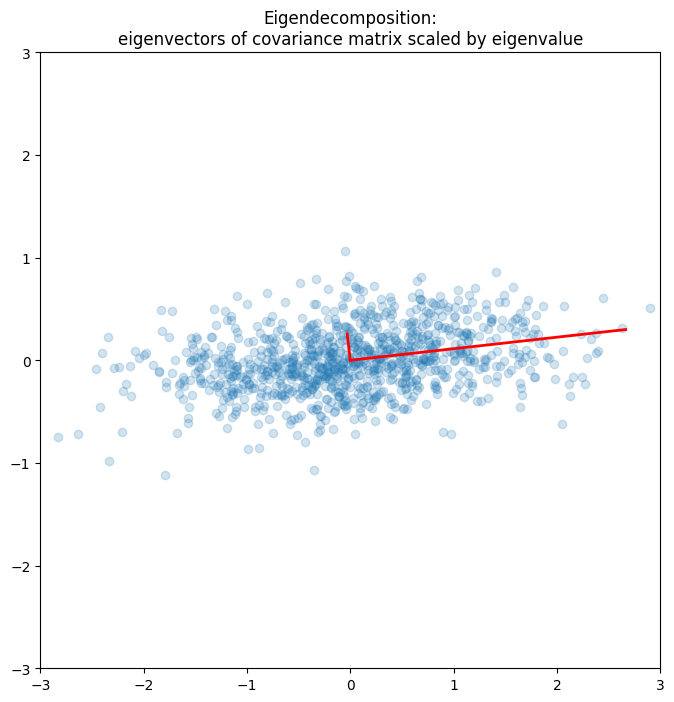

In [36]:
# Graphically represent the eigenvectors rescaled by the eigenvalues
plt.figure(figsize=(8, 8))
# the original data distribution
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 3

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\neigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-3, 3, -3, 3])
plt.title('Eigendecomposition:\neigenvectors of covariance matrix scaled by eigenvalue')

We can now use the eigenvectors and eigenvalues to rotate the data, i.e. take the eigenvectors as new basis vectors and redefine the data points w.r.t. this new basis:

$$X' = X \cdot V$$

(-3.0, 3.0, -3.0, 3.0)

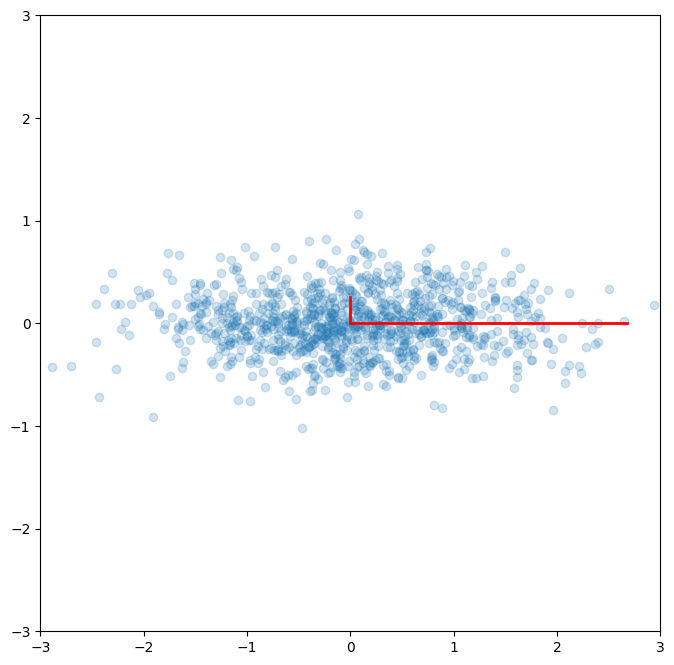

In [37]:
# rotate all the data points accordingly to the new base by multiplying by the matrix V
Xp = np.dot(X, V)

# then plot the rotated dataset and its "axes"
plt.figure(figsize=(8, 8))
plt.scatter(Xp[:, 0], Xp[:, 1], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, np.dot(V.T, V)): # np.dot(V.T, V) is equivalent to np.diag([1]*len(l))
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3, 3, -3, 3])

For example, if we only use the first column of `Xp`, we will have the projection of the data onto the first principal component, capturing the majority of the variance in the data using only a single feature that is a linear combination of the original features.

We may need to transform the (reduced) data set to the original feature coordinates for interpreation. This is simply another linear transform (matrix multiplication):

$$X'' = X' \cdot V^T$$

(-3.0, 3.0, -3.0, 3.0)

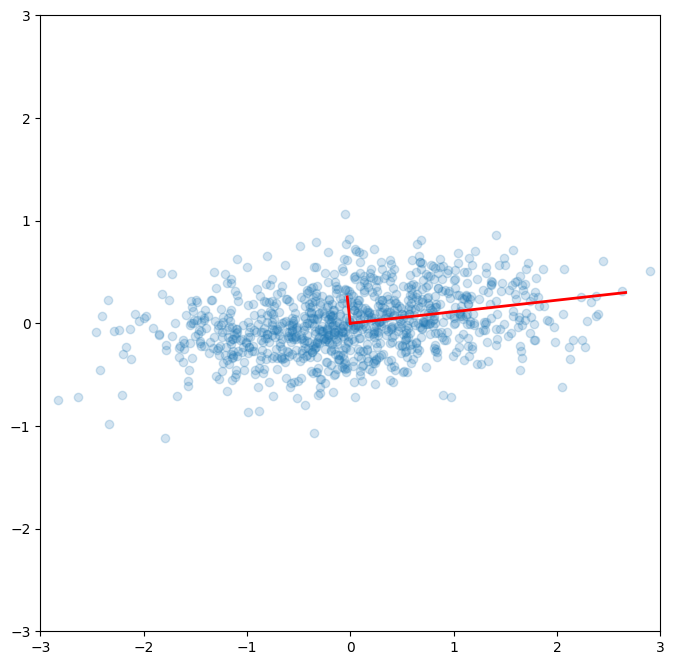

In [38]:
# rotate back the data to the original basis, this time by multiplying by the matrix V^T, the opposite as before
Xpp = np.dot(Xp, V.T)

# re-plot in the original basis
plt.figure(figsize=(8, 8))
plt.scatter(Xpp[:, 0], Xpp[:, 1], alpha=0.2)
for li, vi in zip(l, V.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3, 3, -3, 3])

#### Dimension reduction via PCA

Given the spectral decomposition:

$$ 
A=V\Lambda V^{-1}
$$

with $\Lambda$ of rank $p$. Reducing the dimensionality to $k<p$ simply means setting to zero all but the first $k$ diagonal values (ordered from the largest to the smaller in module; that is the default in numpy/scipy).

In this way we catch the most relevant part of its variability (covariance).

Since the trace is invariant under change of basis, the total variability is also unchaged by PCA. By keeping only the first $k$ principal components, we can still retain $\sum_1^k \lambda_i/\sum_1^p \lambda_i$ of the total variability.

In general, the degree of dimension reduction is specified as keeping enough principal components so that a certain fraction (say 90%) of the total variability is retained.

In the previous example, let's consider only the component that exhibits the largest variability, and discard the other:

In [39]:
#l, V = np.linalg.eig(cov)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))

Lambda:
 [[0.89398162 0.        ]
 [0.         0.08624931]] 

Trace(A):
 0.9802309325072543 

Trace(Lambda):
 0.9802309325072542 

By selecting the component 0, we retain 0.91% of the total variability


### PCA with SVD

We saw that SVD is a decomposition of the data matrix $X=UDV^T$ where $U$ and $V$ are orthogonal matrices and $D$ is a diagnonal matrix.

Compared with the eigendecomposition of a matrix $A=W\Lambda W^{−1}$, we see that SVD gives us the eigendecomposition of the matrix $XX^T$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $V^T$ and eigenvalues by $D^2 / (n-1)$.

In [40]:
# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(n-1)
# The matrix Vt already contains the eigenvectors

print("U:\n", U, '\n')
print("S:\n", S, '\n')
print("Vt:\n", Vt, '\n')

U:
 [[-2.53765607e-02 -2.07119541e-02  8.90278400e-03 ...  1.53884360e-02
   3.23819530e-02 -1.48789897e-02]
 [ 1.73804149e-02 -8.27208542e-04 -4.81939088e-02 ... -1.11594989e-02
  -1.55348824e-02  1.10597158e-02]
 [ 1.23473084e-02 -4.74351885e-02  9.97603195e-01 ... -6.82963003e-04
  -1.05598182e-03  6.73285553e-04]
 ...
 [ 1.61527342e-02 -1.00369823e-02 -6.59746916e-04 ...  9.99644565e-01
  -6.61466251e-04  3.46601876e-04]
 [ 3.34185326e-02 -1.31935804e-02 -1.00457037e-03 ... -6.57045219e-04
   9.98736290e-01  6.39327664e-04]
 [-1.56373829e-02  9.97365486e-03  6.50924830e-04 ...  3.46751872e-04
   6.43917970e-04  9.99661818e-01]] 

S:
 [29.88588803  9.28240972] 

Vt:
 [[-0.99374151 -0.1117041 ]
 [-0.1117041   0.99374151]] 



In [41]:
# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

Eigendecomposition:
 [0.89398162 0.08624931]
SVD:
 [0.89406036 0.08624938]


In [42]:
# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", Vt)

Eigendecomposition:
 [[ 0.99374184 -0.11170121]
 [ 0.11170121  0.99374184]]
SVD:
 [[-0.99374151 -0.1117041 ]
 [-0.1117041   0.99374151]]


(-3.0, 3.0, -3.0, 3.0)

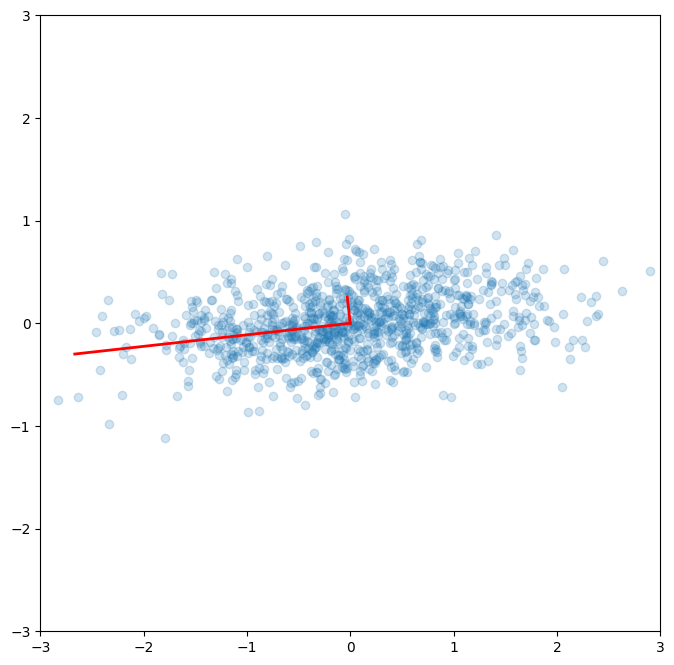

In [43]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l_svd, Vt):
    #print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
plt.axis([-3, 3, -3, 3])

We can do the same as before, and rotate the data to the new basis of the eigenvectors:

(-3.0, 3.0, -3.0, 3.0)

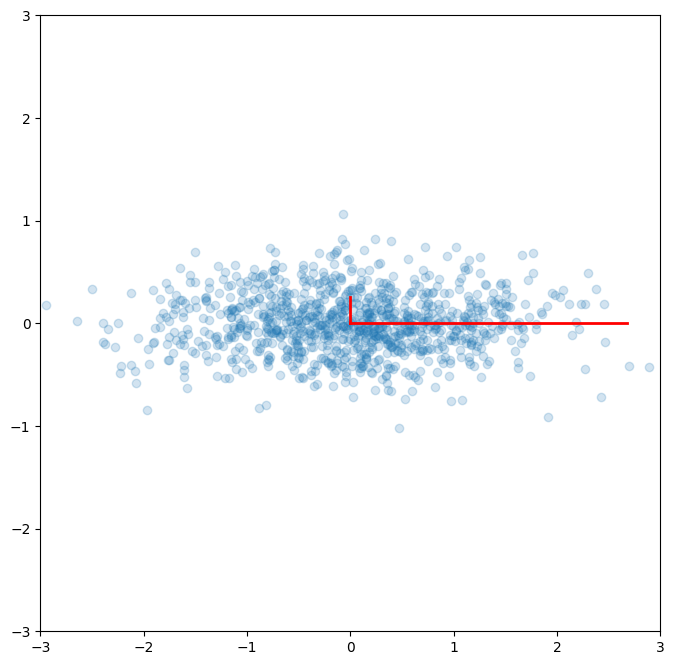

In [44]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xp_svd = np.dot(X, Vt.T)

# then plot the rotated dataset and its "axes"
plt.figure(figsize=(8, 8))
plt.scatter(Xp_svd[:, 0], Xp_svd[:, 1], alpha=0.2)

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l_svd, np.dot(Vt, Vt.T)):
    #print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

plt.axis([-3, 3, -3, 3])

# Algorithmic Complexity

Profiling (e.g. with `timeit`) doesn’t tell us much about how an algorithm will perform on a different computer since it is determined by the hardware features. To compare performance in a device-indpendent fashion, a formalism (a.k.a the "Big-O") is used that characterizes functions in terms of their rates of growth as a function of the size *n* of the input.

An algorithm is compared to a given function $g(n)$ with a well defined scaling with *n*, e.g. $n^2$; if the ratio of the two is bounded, than that algorithm is ${\cal O}(g(n))$. Note that:
* only the largest terms in the scaling of $g(n)$ is kept in the notation
* two algorithms can have the same complexity and have very different performance; the same complexity only implies that the difference in performance is independent of *n*.

### Comparing bubble sort ${\cal O}(n^2)$ and merge sort ${\cal O}(n\log{n})$

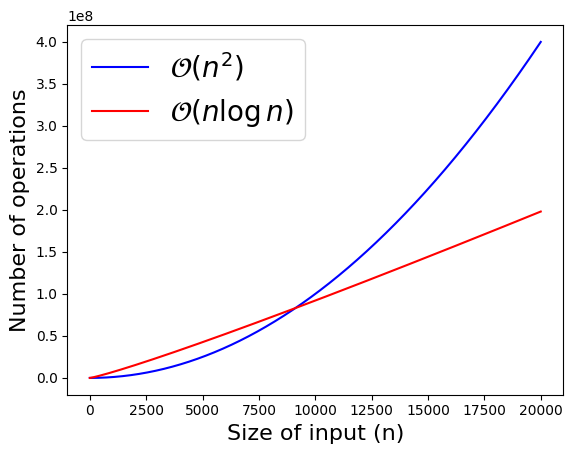

In [45]:
def f1(n, k):
    return k * n * n

def f2(n, k):
    return k * n * np.log(n)

n = np.arange(0.1, 20001)
plt.plot(n, f1(n, 1), c='blue')
plt.plot(n, f2(n, 1000), c='red')
plt.xlabel('Size of input (n)', fontsize=16)
plt.ylabel('Number of operations', fontsize=16)
plt.legend(['$\mathcal{O}(n^2)$', '$\mathcal{O}(n \log n)$'], loc='best', fontsize=20);

See [here](https://wiki.python.org/moin/TimeComplexity) for the complexity of operations on standard Python data structures. Note for instance that searching a list is much more expensive than searching a dictionary.

### Space Complexity

We can also use the ${\cal O}$ notation in the same way to measure the space complexity of an algorithm.  The notion of space complexity becomes important when your data volume is of the same magnitude or larger than the memory you have available. In that case, an algorihtm with high space complexity may end up having to swap memory constantly, and will perform far worse than its time complexity would suggest.

Just as you should have a good idea of how your algorithm will scale with increasing *n*, you should also be able to know how much memory your data structures will require. For example, if you had an $n\times p$ matrix of integers, an $n\times p$ matrix of floats, and an $n\times p$ matrix of complex floats, how large can $n$ and $p$ be before you run out of RAM to store them?

In [46]:
# Notice how much overhead Python objects have:
# a raw integer should be 64 bits or 8 bytes only

import sys
print("int:", sys.getsizeof(1), "bytes") # bytes
print("long:", sys.getsizeof(1234567890123456789012345678901234567890), "bytes")
print("float:", sys.getsizeof(3.14), "bytes")
print("complex:", sys.getsizeof(3j), "bytes")
print("char:", sys.getsizeof('a'), "bytes")
print("string:", sys.getsizeof('hello world'), "bytes")

int: 28 bytes
long: 44 bytes
float: 24 bytes
complex: 32 bytes
char: 50 bytes
string: 60 bytes


In [47]:
print("100x100 bool:", np.ones((100, 100), dtype='bool').nbytes, "bytes")
print("100x100 int:", np.ones((100, 100), dtype='int').nbytes, "bytes") # default is 64 bits or 8 bytes
print("100x100 float:", np.ones((100, 100), dtype='float').nbytes, "bytes") # default is 64 bits or 8 bytes
print("100x100 complex:", np.ones((100, 100), dtype='complex').nbytes, "bytes")
print("10kx10k float:", np.ones((10000, 10000), dtype='float').nbytes / 1e9, "GB")

100x100 bool: 10000 bytes
100x100 int: 80000 bytes
100x100 float: 80000 bytes
100x100 complex: 160000 bytes
10kx10k float: 0.8 GB
